# Демо блокнот к Лекции №2. Предварительный анализ данных с помощью средств языка Python

В этом демо-блокноте мы увидим, как можно получить и визуализировать новую полезную информацию из сырых данных средствами `Pandas` и `matplotlib/seaborn`

Мы воспользуемся данными о ВИЧ-инфекции в России с 2014 года [1], предоставленными платформой с открытыми данными и исследованиями по социальным проблемам в регионах России ["Если быть точным"](https://tochno.st/about).


 [1] - ВИЧ-инфекция в России с 2014 года//; обработка «Если быть точным», 2024. Условия использования: Creative Commons BY 4.0. URL: https://tochno.st/datasets/hiv

# Первый взгляд на данные

Описание набора данных от авторов выглядит так:

39 показателей о зарегистрированном числе людей, живущих с ВИЧ, новых выявленных случаях, пациентах, состоящих на диспансерном учете и получающих лечение, а также других аспектах жизни и лечения людей с ВИЧ. 

    Сведения собраны  в одну таблицу из 7 разных источников: статистических форм Минздрава, Росстата, ФСИН, информационных бюллетеней Федерального научно‑методического центра по профилактике и борьбе со СПИД и Центрального научно-исследовательского института эпидемиологии Роспотребнадзора, данных проекта «Пациентский контроль» и ITPC ECCA.

Единица наблюдения в наборе данных — это регион. Данные для каждого наблюдения приведены по таким атрибутам, как наименование региона, название показателя, единица измерения, год и значение показателя.

Набор доступен для работы в формате CSV (кодировка: «UTF-8», разделитель: «;» ) и XLSX. Набор данных охватывает 2014–2022 годы и содержит 26 244 наблюдения по 13 атрибутам.

## Импорт необходимых библиотек

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка набора данных в датафрейм

In [58]:
df = pd.read_csv('data_hiv_110_v20240626.csv', delimiter=';')
df.head() 

,indicator_section,indicator_name,indicator_unit,indicator_code,object_name,object_level,object_oktmo,object_okato,year,indicator_value,comment,source,reason_na
0,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Y904000001,Российская Федерация,страна,0,0,2022,1168076,"Количество людей, живущих с установленным диагнозом ВИЧ-инфекция на 31 декабря, исключая детей с неустановленным диагнозом. Данные по РФ даны с учетом лиц без определенного места жительства. Данные предоставлены территориальными центрами по профилактике и борьбе со СПИД.",Роспотребнадзор,NaN
1,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Y904000001,Свердловская область,регион,65000000,65000000,2022,NaN,"Количество людей, живущих с установленным диагнозом ВИЧ-инфекция на 31 декабря, исключая детей с неустановленным диагнозом. Данные по РФ даны с учетом лиц без определенного места жительства. Данные предоставлены территориальными центрами по профилактике и борьбе со СПИД.",Роспотребнадзор,отсутствовали данные в источнике или отдельно не запрашивали за указанный период
2,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Y904000001,Москва,регион,45000000,45000000,2022,NaN,"Количество людей, живущих с установленным диагнозом ВИЧ-инфекция на 31 декабря, исключая детей с неустановленным диагнозом. Данные по РФ даны с учетом лиц без определенного места жительства. Данные предоставлены территориальными центрами по профилактике и борьбе со СПИД.",Роспотребнадзор,отсутствовали данные в источнике или отдельно не запрашивали за указанный период
3,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Y904000001,Санкт-Петербург,регион,40000000,40000000,2022,NaN,"Количество людей, живущих с установленным диагнозом ВИЧ-инфекция на 31 декабря, исключая детей с неустановленным диагнозом. Данные по РФ даны с учетом лиц без определенного места жительства. Данные предоставлены территориальными центрами по профилактике и борьбе со СПИД.",Роспотребнадзор,отсутствовали данные в источнике или отдельно не запрашивали за указанный период
4,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Y904000001,Самарская область,регион,36000000,36000000,2022,NaN,"Количество людей, живущих с установленным диагнозом ВИЧ-инфекция на 31 декабря, исключая детей с неустановленным диагнозом. Данные по РФ даны с учетом лиц без определенного места жительства. Данные предоставлены территориальными центрами по профилактике и борьбе со СПИД.",Роспотребнадзор,отсутствовали данные в источнике или отдельно не запрашивали за указанный период


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26244 entries, 0 to 26243
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   indicator_section  26244 non-null  object
 1   indicator_name     26244 non-null  object
 2   indicator_unit     26244 non-null  object
 3   indicator_code     26244 non-null  object
 4   object_name        26244 non-null  object
 5   object_level       26244 non-null  object
 6   object_oktmo       26244 non-null  int64 
 7   object_okato       26244 non-null  int64 
 8   year               26244 non-null  int64 
 9   indicator_value    19299 non-null  object
 10  comment            26244 non-null  object
 11  source             26244 non-null  object
 12  reason_na          6945 non-null   object
dtypes: int64(3), object(10)
memory usage: 2.6+ MB


In [ ]:
df['indicator_value'] =(
    df['indicator_value']
    .astype(str)
    .str.replace(',', '.', regex=False)    # меняем запятую на точку
    .str.replace(r'\s+', '', regex=True)   # удаляем все пробелы, включая неразрывные
    .astype(float)
)

Мы видим, что в наборе данных 26244 строки, но пока не понимаем, что представляет из себя каждая строка и какой смысл стоит за аттрибутами. Попробуем это прояснить, изучив официальное описание.

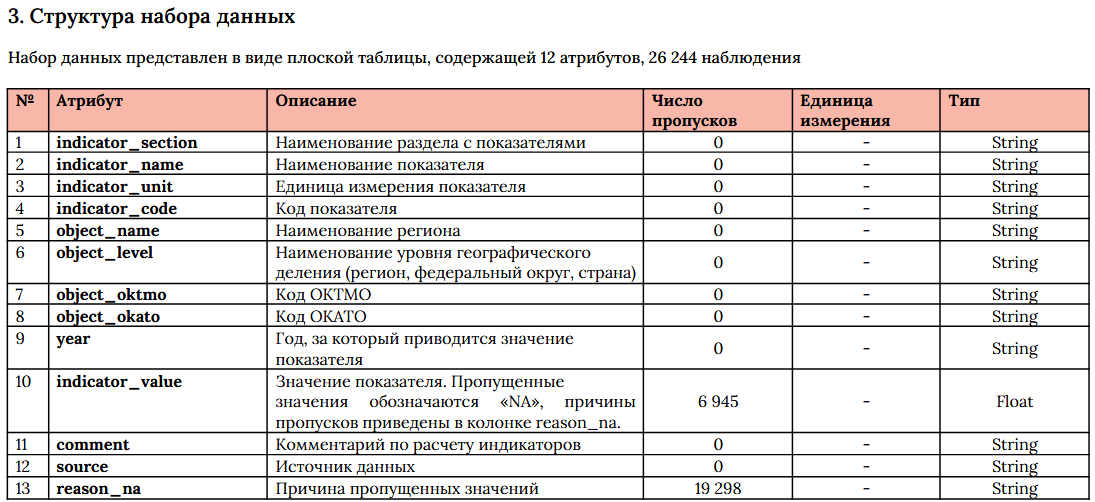

Некоторые аттрибуты обрели смысл (например, year и коды административных единиц), но такие как indicator_section и indicator_name остаются непонятными.

Посмотрим на уникальные значения для некоторых показателей

In [5]:
df['indicator_section'].unique(), df['indicator_unit'].unique(), df['indicator_name'].unique()

(array(['Масштаб', 'Заболеваемость/выявляемость ВИЧ',
        'Профилактика, лечение и диспансерный учет', 'Смертность'],
       dtype=object),
 array(['человек', 'на 100 тыс. населения', 'процент', 'годовых курсов',
        'сообщений'], dtype=object),
 array(['Численность людей, живущих с ВИЧ (ЛЖВ)',
        'Выявлено за год (всего)',
        'Рожденные дети от ВИЧ+ матерей с подтвержденным статусом',
        ' Родилось живыми детей от ВИЧ+ матерей',
        'Число обследованных на ВИЧ беременных женщин, окончивших беременность',
        'Число беременных женщин, у которых выявлены антитела к ВИЧ (закончивших беременность)',
        'Умерло человек от ВИЧ-инфекции',
        'Численность людей с ВИЧ среди заключенных',
        'Доля людей с ВИЧ от всех заключенных',
        'Численность врачей-инфекционистов',
        'Численность людей, обследованных на антитела к ВИЧ',
        'Доля населения, охваченная обследованнием на ВИЧ (от всего населения)',
        'Состоят на диспансерном у

In [6]:
df['object_name'].unique(), df['object_level'].unique()

(array(['Российская Федерация', 'Свердловская область', 'Москва',
        'Санкт-Петербург', 'Самарская область', 'Кемеровская область',
        'Московская область', 'Иркутская область', 'Челябинская область',
        'Новосибирская область', 'Пермский край', 'Красноярский край',
        'Оренбургская область', 'Ленинградская область', 'Алтайский край',
        'Республика Башкортостан', 'Нижегородская область',
        'Ханты-Мансийский автономный округ — Югра', 'Республика Крым',
        'Краснодарский край', 'Тюменская область без автономных округов',
        'Омская область', 'Республика Татарстан', 'Саратовская область',
        'Ростовская область', 'Ульяновская область',
        'Волгоградская область', 'Приморский край', 'Тверская область',
        'Томская область', 'Удмуртская Республика', 'Ивановская область',
        'Курганская область', 'Тульская область', 'Республика Бурятия',
        'Калининградская область', 'Владимирская область',
        'Пензенская область', 'Мурм

In [7]:
np.sort(df['year'].unique())

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [8]:
df.loc[df['indicator_section'] == 'Масштаб']['indicator_name'].unique()

array(['Численность людей, живущих с ВИЧ (ЛЖВ)',
       'Численность людей с ВИЧ среди заключенных',
       'Доля людей с ВИЧ от всех заключенных',
       'Доля лиц с ВИЧ, сведения о которых внесены в Федеральный регистр (с 2020 года, факт)'],
      dtype=object)

In [9]:
df.loc[df['indicator_section'] == 'Заболеваемость/выявляемость ВИЧ']['indicator_name'].unique()

array(['Выявлено за год (всего)',
       'Число обследованных на ВИЧ беременных женщин, окончивших беременность',
       'Число беременных женщин, у которых выявлены антитела к ВИЧ (закончивших беременность)',
       'Численность людей, обследованных на антитела к ВИЧ',
       'Доля населения, охваченная обследованнием на ВИЧ (от всего населения)',
       'Выявлено новых случаев ВИЧ на 100 тысяч обследованных',
       'Выявлено новых случаев ВИЧ среди мужчин',
       'Выявлено новых случаев ВИЧ среди женщин'], dtype=object)

Итак, перед нами несгруппированные данные, где (пока предположительно) для каждого региона РФ (`object_name`) собраны различные эпидемологические показатели (`indicator_name`), относящиеся к тому или иному типу (`indicator_section`), за 2014-2022 годы.

Для получения полезной информации из таких данных нам необходимо их предварительно группировать с помощью функции `groupby`.

Однако перед этим для удобства создадим "справочные таблички" с кодами регионов и эпидемиологических показателей:

In [97]:
pd.set_option('display.max_rows', 200)  # корректировка ограничений на вывод строк
pd.set_option('display.max_colwidth', 300) # корректировка ограничений на ширину столбцов


region_codes = df[['object_name', 'object_okato']].drop_duplicates()
region_codes

,object_name,object_okato
0,Российская Федерация,0
1,Свердловская область,65000000
2,Москва,45000000
3,Санкт-Петербург,40000000
4,Самарская область,36000000
5,Кемеровская область,32000000
6,Московская область,46000000
7,Иркутская область,25000000
8,Челябинская область,75000000
9,Новосибирская область,50000000


In [11]:
df[['indicator_section', 'indicator_unit', 'indicator_name', 'indicator_code', 'source', 'comment']].drop_duplicates()

,indicator_section,indicator_unit,indicator_name,indicator_code,source,comment
0,Масштаб,человек,"Численность людей, живущих с ВИЧ (ЛЖВ)",Y904000001,Роспотребнадзор,"Количество людей, живущих с установленным диагнозом ВИЧ-инфекция на 31 декабря, исключая детей с неустановленным диагнозом. Данные по РФ даны с учетом лиц без определенного места жительства. Данные предоставлены территориальными центрами по профилактике и борьбе со СПИД."
774,Масштаб,на 100 тыс. населения,"Численность людей, живущих с ВИЧ (ЛЖВ)",Y904000002,Роспотребнадзор,"Количество людей, живущих с установленным диагнозом ВИЧ-инфекция на 31 декабря, исключая детей с неустановленным диагнозом. Данные по РФ даны с учетом лиц без определенного места жительства. Данные предоставлены территориальными центрами по профилактике и борьбе со СПИД."
1548,Заболеваемость/выявляемость ВИЧ,человек,Выявлено за год (всего),Y904000003,Роспотребнадзор,"Количество новых зарегистрированных случаев ВИЧ-инфекции среди жителей субъектов Российской Федерации, ежегодные бюллетени «ВИЧ-инфекция», публикуемые Федеральным научно-методическим центром по профилактике и борьбе со СПИДом Роспотребнадзора (данные по РФ даны с учетом лиц без определенного мес..."
2322,Заболеваемость/выявляемость ВИЧ,на 100 тыс. населения,Выявлено за год (всего),Y904000004,Роспотребнадзор,"Количество новых зарегистрированных случаев ВИЧ-инфекции среди жителей субъектов Российской Федерации, ежегодные бюллетени «ВИЧ-инфекция», публикуемые Федеральным научно-методическим центром по профилактике и борьбе со СПИДом Роспотребнадзора (данные по РФ даны с учетом лиц без определенного мес..."
3096,Заболеваемость/выявляемость ВИЧ,человек,Выявлено за год (всего),Q304000001,Минздрав,"Число пациентов с впервые в жизни установленным диагнозом (Форма № 61). Для расчета удельных значений используется численность постоянного населения на 1 января отчетного года, по данным Росстата."
3870,Заболеваемость/выявляемость ВИЧ,на 100 тыс. населения,Выявлено за год (всего),Q304000002,Минздрав,"Число пациентов с впервые в жизни установленным диагнозом (Форма № 61). Для расчета удельных значений используется численность постоянного населения на 1 января отчетного года, по данным Росстата."
4644,"Профилактика, лечение и диспансерный учет",человек,Рожденные дети от ВИЧ+ матерей с подтвержденным статусом,Q304000003,Минздрав,"Родилось живых детей от матерей, больных ВИЧ-инфекцией, из них детей, у которых подтверждено наличие ВИЧ-инфекции (Форма № 61)"
5418,"Профилактика, лечение и диспансерный учет",человек,Родилось живыми детей от ВИЧ+ матерей,Q304000004,Минздрав,"Родилось живыми детей от матерей, больных ВИЧ-инфекцией. Форма № 61"
6192,Заболеваемость/выявляемость ВИЧ,человек,"Число обследованных на ВИЧ беременных женщин, окончивших беременность",Q304000005,Минздрав,"Число женщин, обследованных на антитела ВИЧ, у которых закончилась беременность. Форма № 32"
6966,Заболеваемость/выявляемость ВИЧ,человек,"Число беременных женщин, у которых выявлены антитела к ВИЧ (закончивших беременность)",Q304000006,Минздрав,"Выявлены антитела к ВИЧ среди обследованных женщин, закончивших беременность (форма №32)."


Посмотрим, сколько жило людей с ВИЧ (ЛЖВ) в Москве :

In [12]:
(df.
 loc[(df.indicator_code == 'Y904000001') & (df.object_okato == 45000000)].
 groupby(['year'])['indicator_value'].
 first()
)

year
2014    43341
2015    56181
2016    53750
2017    61156
2018    68607
2019    74421
2020    80315
2021    85570
2022     None
Name: indicator_value, dtype: object

Видно, что меньше чем за 10 лет число ЛЖВ увеличилось почти вдвое. На 2022 год информации о численности нет, посмотрим, какая указана причина:

In [13]:
(df.
 loc[(df.indicator_code == 'Y904000001') &
     (df.object_okato == 45000000) &
     (df.year == 2022)
     ])['reason_na']

2    отсутствовали данные в источнике или отдельно не запрашивали за указанный период
Name: reason_na, dtype: object

## Невидимая эпидемия

Согласно классификации [ВОЗ](https://ru.wikipedia.org/wiki/%D0%92%D1%81%D0%B5%D0%BC%D0%B8%D1%80%D0%BD%D0%B0%D1%8F_%D0%BE%D1%80%D0%B3%D0%B0%D0%BD%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B7%D0%B4%D1%80%D0%B0%D0%B2%D0%BE%D0%BE%D1%85%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F "Всемирная организация здравоохранения"), существуют 3 стадии распространения эпидемии ВИЧ. 

1. Заражено менее 1 % населения в целом и менее 5 % — в уязвимых группах.
2. Заражено более 5 % в одной уязвимой группе -- стадия концентрирования.
3. ВИЧ-инфекция выходит за рамки одной группы, эпидемия охватывает широкие слои населени -- инфицировано более 1% от населения, [[32]](https://ru.wikipedia.org/wiki/%D0%92%D0%98%D0%A7/%D0%A1%D0%9F%D0%98%D0%94_%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#cite_note-_3f9523ccdecb719b-32), а доля ВИЧ-инфицированных среди беременных женщин достигает 1 %[[33]](https://ru.wikipedia.org/wiki/%D0%92%D0%98%D0%A7/%D0%A1%D0%9F%D0%98%D0%94_%D0%B2_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8#cite_note-novaekbberenennye-33).

Посмотрим на общее количества людей с ВИЧ в Российской Федерации с 2014 по 2022 годы.

<Axes: title={'center': 'Численность людей, живущих с ВИЧ (ЛЖВ) в России'}, xlabel='Год', ylabel='Число людей'>

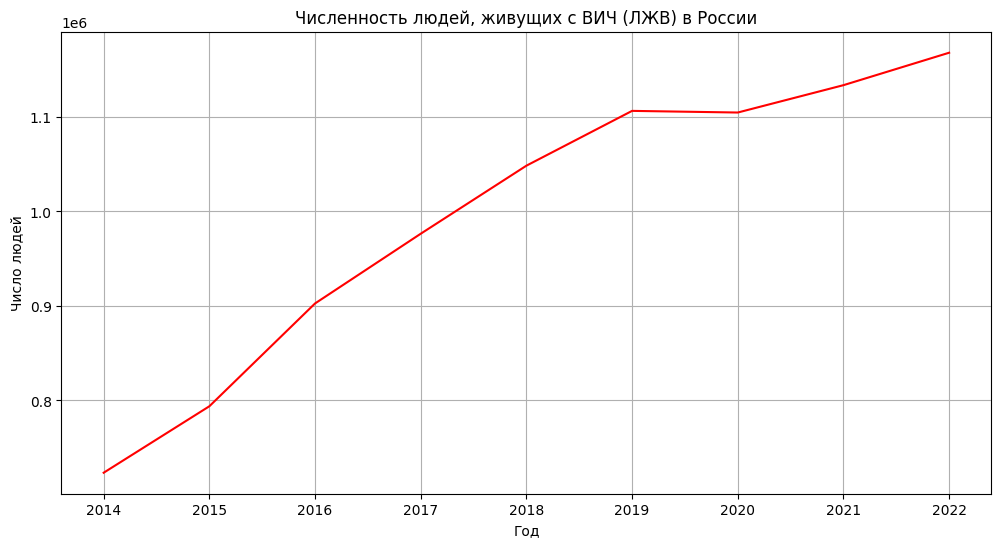

In [134]:
(df.
 loc[(df.indicator_code == 'Y904000001') &
        (df.object_okato == 0)
]).groupby(['year'])['indicator_value'].first().plot(
        kind='line',
        figsize=(12, 6),
        title='Численность людей, живущих с ВИЧ (ЛЖВ) в России',
        xlabel='Год',
        ylabel='Число людей',
        color = 'red',
        grid=True
)

Посчитаем % от общего числа населения (примерное общеизвестное значение -- 140 млн.)

In [140]:
df.loc[
    (df.indicator_code == 'Y904000001') &
    (df.object_okato == 0) &
    (df.year == 2022)]['indicator_value'] / 14000000 * 100

0    0.858879
Name: indicator_value, dtype: float64

Кого больше среди ЛВЖ -- мужчин или женщин?

[Text(0, 0, 'Выявлено новых случаев ВИЧ среди женщин'),
 Text(1, 0, 'Выявлено новых случаев ВИЧ среди мужчин')]

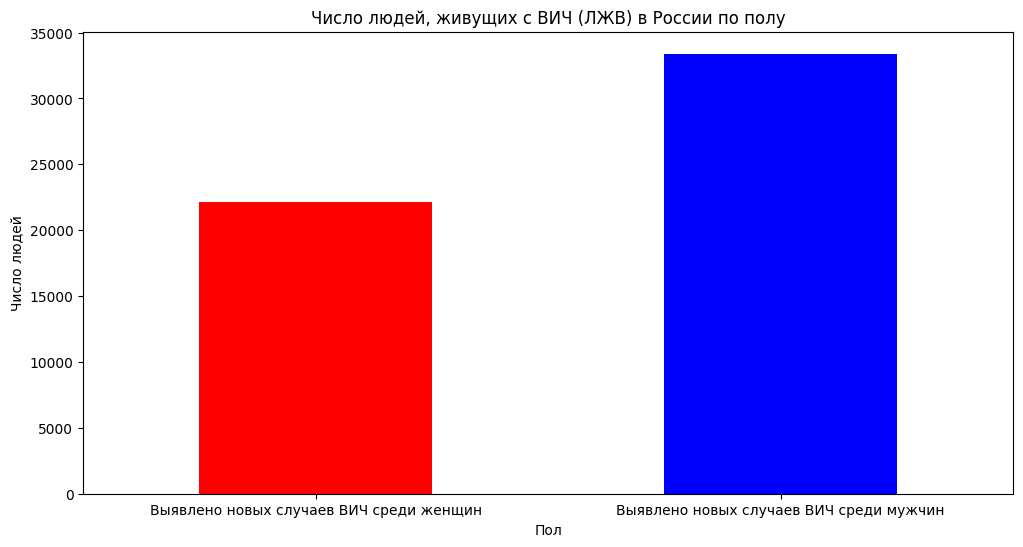

In [192]:
ax = df.loc[
    (df.indicator_code.isin(['Q304000020', 'Q304000021'])) & (df.object_okato == 0) & (df.year == 2022)
].groupby('indicator_name')['indicator_value'].first().plot(
    kind='bar',
    figsize=(12, 6),
    title='Число людей, живущих с ВИЧ (ЛЖВ) в России по полу',
    xlabel='Пол',
    ylabel='Число людей',
    color=['red', 'blue'],
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


В России выявлением новых случаев инфицирования ВИЧ занимаются два ведомства: Минздрав и Роспотребнадзор. 

Посмотрим, какие сведения они приводят по числу выявленных случаев заражения за год.

In [70]:
rospotreb = (
    df.
    loc[
        (df.indicator_code == 'Y904000003') &
        (df.object_okato == 0)
]).groupby(['year'])['indicator_value'].first()

minsdrav = (df.
 loc[(df.indicator_code == 'Q304000001') &
        (df.object_okato == 0)
]).groupby(['year'])['indicator_value'].first()

result = pd.concat([rospotreb, minsdrav], axis=1).reset_index()
result.columns = ['Год', 'Роспотребнадзор', 'Минздрав']    
result

,Год,Роспотребнадзор,Минздрав
0,2014,89705.0,92613.0
1,2015,98037.0,100220.0
2,2016,102278.0,86855.0
3,2017,106560.0,85802.0
4,2018,103995.0,85995.0
5,2019,97176.0,80124.0
6,2020,73085.0,60123.0
7,2021,71595.0,58788.0
8,2022,NaN,56003.0


<Axes: title={'center': 'Выявлено за год (всего) случаев заражения ВИЧ'}, xlabel='Год', ylabel='Число случаев'>

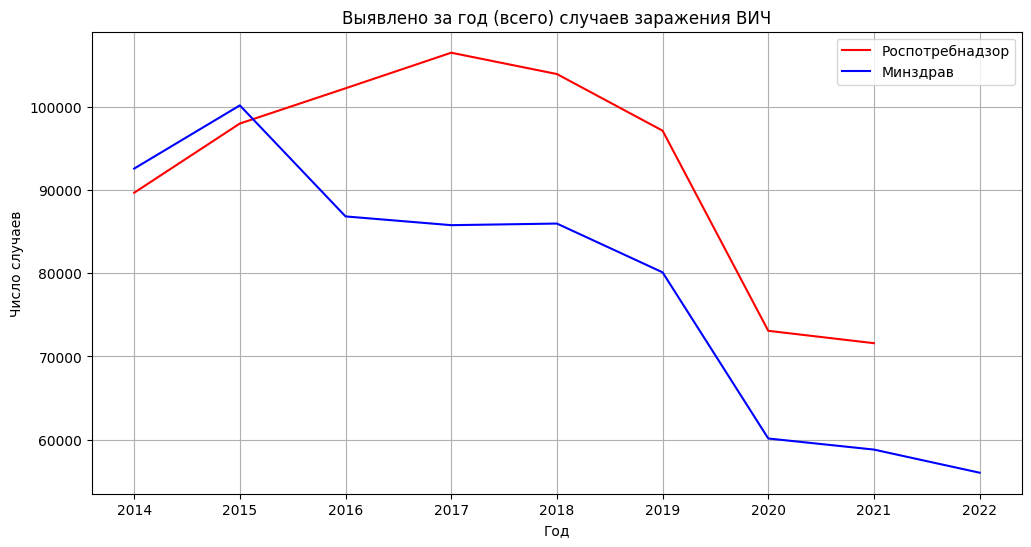

In [73]:
result.plot(
    x='Год', 
    kind='line',
    figsize=(12, 6),
    title='Выявлено за год (всего) случаев заражения ВИЧ',
    xlabel='Год',
    ylabel='Число случаев',
    color = ['red', 'blue'],
    grid=True,
)


Разница в статистике двух ведомств может объясняться несколькими причинами:
- Министерство здравоохранения учитывает количество людей, обратившихся за медицинской помощью и представивших паспорт и СНИЛС. Пресс-служба Минздрава России называет собственные данные «единственным официальным и наиболее точным источником информации о ситуации с ВИЧ-инфекцией в стране», так как все остальные системы подсчёта носят оценочный характер.
- Роспотребнадзор учитывает процент ВИЧ-положительных результатов в общем количестве проведённых тестов крови. По состоянию на 2018 год Россия являлась единственной страной в мире, практикующей полицевой учёт пациентов с ВИЧ. Ряд экспертов критиковал действовавшую систему. По мнению академика Вадима Покровского, такая практика приводит к разнице между фиксируемым и реальными показателями.

В имеющихся данных есть несколько показателей, описывающих так называемый *вертикальный* канал распространения ВИЧ-инфекции: от матери к ребёнку.

In [148]:
[
    name for name in df['indicator_name'].dropna().unique()
    if 'беремен' in name.lower()
]


['Число обследованных на ВИЧ беременных женщин, окончивших беременность',
 'Число беременных женщин, у которых выявлены антитела к ВИЧ (закончивших беременность)']

Посчитаем и визуализируем два отношения:
- доля ВИЧ+ беременных женщин среди всех обследованных
- доля живых ВИЧ+ детей среди всех рожденных от ВИЧ+ женщин

<Axes: title={'center': '% беременных женщин с ВИЧ от числа обследованных'}, xlabel='Год'>

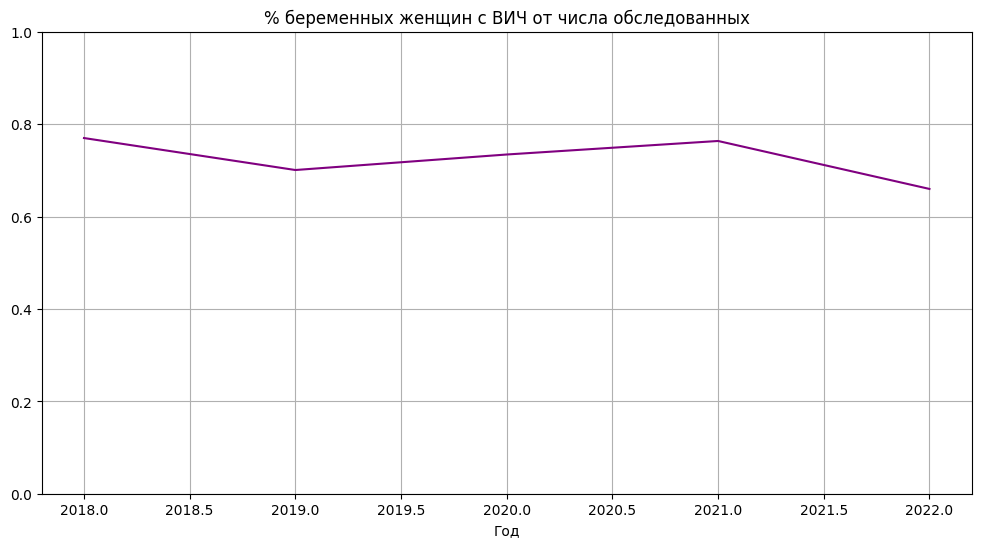

In [ ]:
pregnant_analysed = (df.
 loc[(df.indicator_code == 'Q304000005') &
        (df.object_okato == 0)
]).groupby(['year'])['indicator_value'].first()


pregnant_hiv = (df.
 loc[(df.indicator_code == 'Q304000006') &
        (df.object_okato == 0)
]).groupby(['year'])['indicator_value'].first()


result = pd.concat([pregnant_analysed, pregnant_hiv], axis=1)
result = result.fillna(0) 
result.columns = ['Число обследованных', 'Число ВИЧ+ беременных женщин']

result['Доля ВИЧ+ беременных женщин'] = result['Число ВИЧ+ беременных женщин'] / result['Число обследованных'] * 100


result['Доля ВИЧ+ беременных женщин'].plot(
    kind='line',
    figsize=(12, 6),
    title='% беременных женщин с ВИЧ от числа обследованных',
    xlabel='Год',
    color = ['purple'],
    grid=True,
    ylim=(0, 1.0)
)

<Axes: title={'center': '% детей с ВИЧ от числа рожденных от ВИЧ+ матерей'}, xlabel='Год'>

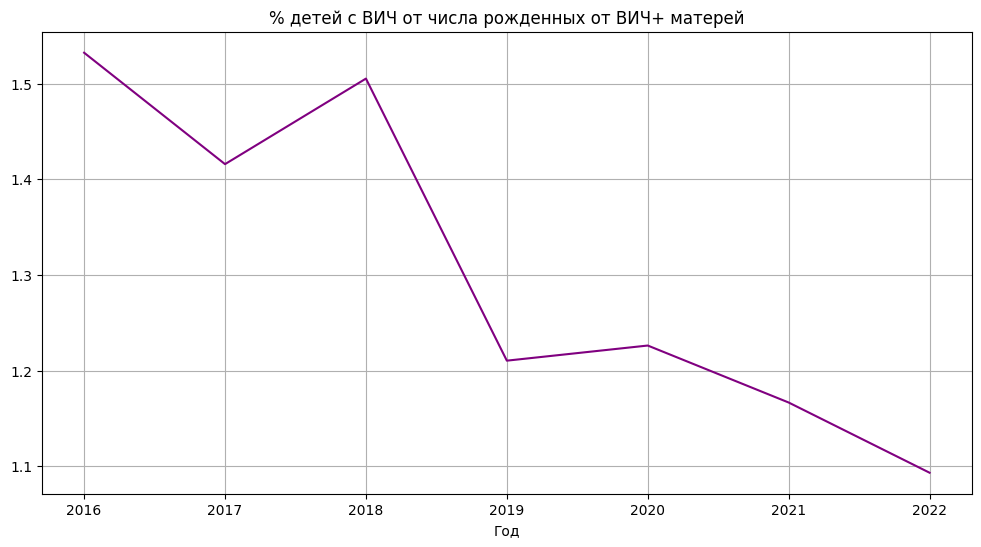

In [125]:
alive_children = (df.
 loc[(df.indicator_code == 'Q304000004') &
        (df.object_okato == 0)
]).groupby(['year'])['indicator_value'].first()


children_hiv = (df.
 loc[(df.indicator_code == 'Q304000003') &
        (df.object_okato == 0)
]).groupby(['year'])['indicator_value'].first()


result = pd.concat([alive_children, children_hiv], axis=1)
result = result.fillna(0) 
result.columns = ['Число рожденных от ВИЧ+ матерей', 'Число рожденных инцифицированных детей']

result['Доля ВИЧ+ детей'] = result['Число рожденных инцифицированных детей'] / result['Число рожденных от ВИЧ+ матерей'] * 100


result['Доля ВИЧ+ детей'].plot(
    kind='line',
    figsize=(12, 6),
    title='% детей с ВИЧ от числа рожденных от ВИЧ+ матерей',
    xlabel='Год',
    color = ['purple'],
    grid=True,
    # ylim=(0, 1.0)
)

In [126]:
result

,Число рожденных от ВИЧ+ матерей,Число рожденных инцифицированных детей,Доля ВИЧ+ детей
year,,,
2014,0.0,0.0,NaN
2015,0.0,0.0,NaN
2016,15989.0,245.0,1.532303
2017,15044.0,213.0,1.415847
2018,14549.0,219.0,1.505258
2019,13714.0,166.0,1.210442
2020,13211.0,162.0,1.226251
2021,13114.0,153.0,1.166692
2022,11799.0,129.0,1.093313


В имеющихся данных есть возможность посмотреть статистику в разбивке по регионам. Для простоты мы добавим колонку с обозначением Федерального округа, объединяюещего несколько регионов.

In [98]:
federal_districts = {
    'Центральный': [
        14000000, 15000000, 17000000, 20000000, 24000000, 28000000, 29000000,
        33000000, 34000000, 38000000, 42000000, 46000000, 54000000, 61000000,
        66000000, 68000000, 70000000, 78000000, 45000000
    ],
    'Северо-Западный': [
        86000000, 87000000, 11000000, 11200000, 11700000, 19000000, 27000000,
        41000000, 47000000, 49000000, 58000000, 40000000, 11100000
    ],
    'Южный': [
        79000000, 85000000, 35000000, 3000000, 12000000, 18000000,
        60000000, 67000000
    ],
    'Северо-Кавказский': [
        82000000, 26000000, 83000000, 91000000, 90000000, 96000000, 7000000
    ],
    'Приволжский': [
        80000000, 88000000, 89000000, 92000000, 94000000, 97000000,
        57000000, 33000000, 22000000, 53000000, 56000000, 36000000,
        63000000, 73000000
    ],
    'Уральский': [
        37000000, 65000000, 71200000, 75000000, 71100000, 71140000
    ],
    'Сибирский': [
        84000000, 93000000, 95000000, 1000000, 25000000, 32000000,
        50000000, 52000000, 69000000, 76000000
    ],
    'Дальневосточный': [
        81000000, 98000000, 30000000, 5000000, 8000000, 10000000,
        44000000, 64000000, 99000000, 77000000
    ]
}

In [149]:

records = []
for district, okato_list in federal_districts.items():
    for code in okato_list:
        records.append({'object_okato': code, 'federal_district': district})

okrug_df = pd.DataFrame(records)

okrug_df.head()

,object_okato,federal_district
0,14000000,Центральный
1,15000000,Центральный
2,17000000,Центральный
3,20000000,Центральный
4,24000000,Центральный


In [100]:
df = df.merge(okrug_df, on='object_okato', how='left')
df['federal_district'].unique()

array([nan, 'Уральский', 'Центральный', 'Северо-Западный', 'Приволжский',
       'Сибирский', 'Южный', 'Дальневосточный', 'Северо-Кавказский'],
      dtype=object)

Посмотрим, какой федеральный округ является "лидером" по числу выявленных случаев ВИЧ на 100 тысяч населения.

In [ ]:
(df.
 loc[(df['indicator_code'] == 'Y904000004')].
    groupby(['federal_district', 'year'])['indicator_value'].
    agg(['mean', 'max']).
    reset_index().
    pivot(index='year', columns='federal_district', values=['mean'])
)

mean                              \
federal_district Дальневосточный Приволжский Северо-Западный   
year                                                           
2014                       29.30   56.714286       38.727273   
2015                       34.20   64.500000       44.000000   
2016                       39.00   66.071429       44.000000   
2017                       37.80   70.000000       44.818182   
2018                       44.80   66.928571       47.181818   
2019                       40.81   64.042857       44.100000   
2020                       35.09   47.507143       35.945455   
2021                       37.99   48.464286       37.900000   
2022                         NaN         NaN             NaN   

                                                                               
federal_district Северо-Кавказский Сибирский   Уральский Центральный    Южный  
year                                                                           
2014                     12.571429    104.30  105.833333   28.263158  35.3750  
2015                     15.142857    111.30  125.166667   34.842105  30.0000  
2016                     19.428571    105.40  121.166667   39.263158  43.6250  
2017                     22.142857    110.80  118.500000   43.526316  48.5000  
2018                     21.571429    107.70  107.500000   44.263158  50.2500  
2019                     22.271429     97.17   95.716667   41.573684  49.0875  
2020                     16.371429     70.56   69.350000   31.063158  35.1750  
2021                     16.485714     66.35   69.566667   31.778947  33.2375  
2022                           NaN       NaN         NaN         NaN      NaN

In [130]:
rospotreb = (
    df.
    loc[
        (df.indicator_code == 'Y904000004') &
        (df.federal_district == 'Уральский')
]).groupby(['year'])['indicator_value'].mean()

minsdrav = (df.
 loc[(df.indicator_code == 'Q304000002') &
         (df.federal_district == 'Уральский')
]).groupby(['year'])['indicator_value'].mean()

result = pd.concat([rospotreb, minsdrav], axis=1).reset_index()
result.columns = ['Год', 'Роспотребнадзор', 'Минздрав']    
result

,Год,Роспотребнадзор,Минздрав
0,2014,105.833333,102.333333
1,2015,125.166667,112.000000
2,2016,121.166667,99.166667
3,2017,118.500000,103.000000
4,2018,107.500000,93.500000
5,2019,95.716667,87.516667
6,2020,69.350000,63.333333
7,2021,69.566667,67.916667
8,2022,NaN,58.050000


<Axes: title={'center': 'Выявлено за год (всего) случаев заражения ВИЧ'}, xlabel='Год', ylabel='Число случаев'>

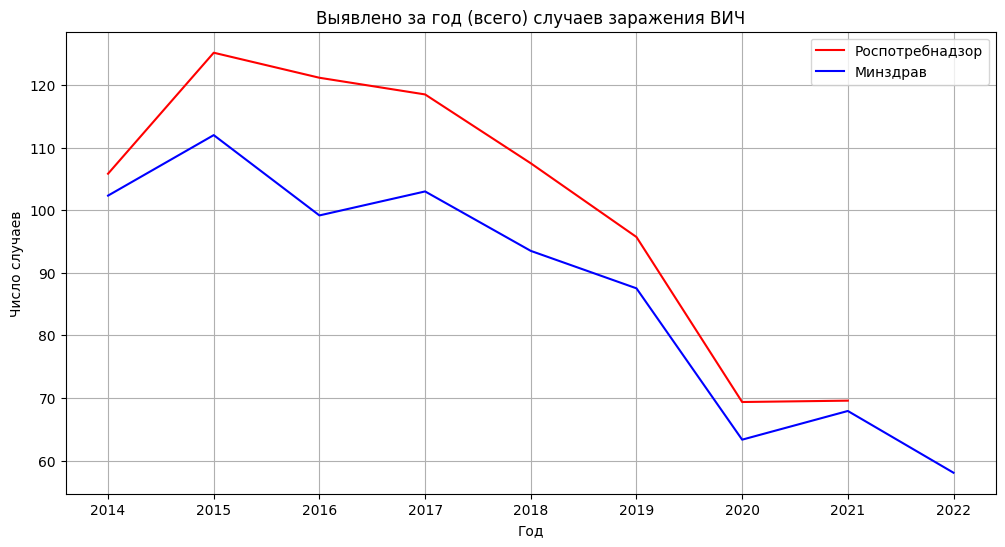

In [131]:
result.plot(
    x='Год', 
    kind='line',
    figsize=(12, 6),
    title='Выявлено за год (всего) случаев заражения ВИЧ',
    xlabel='Год',
    ylabel='Число случаев',
    color = ['red', 'blue'],
    grid=True,
)


<Axes: title={'center': 'Численность людей, живущих с ВИЧ (ЛЖВ), Роспотребнадзор'}, xlabel='Год', ylabel='Количество человек'>

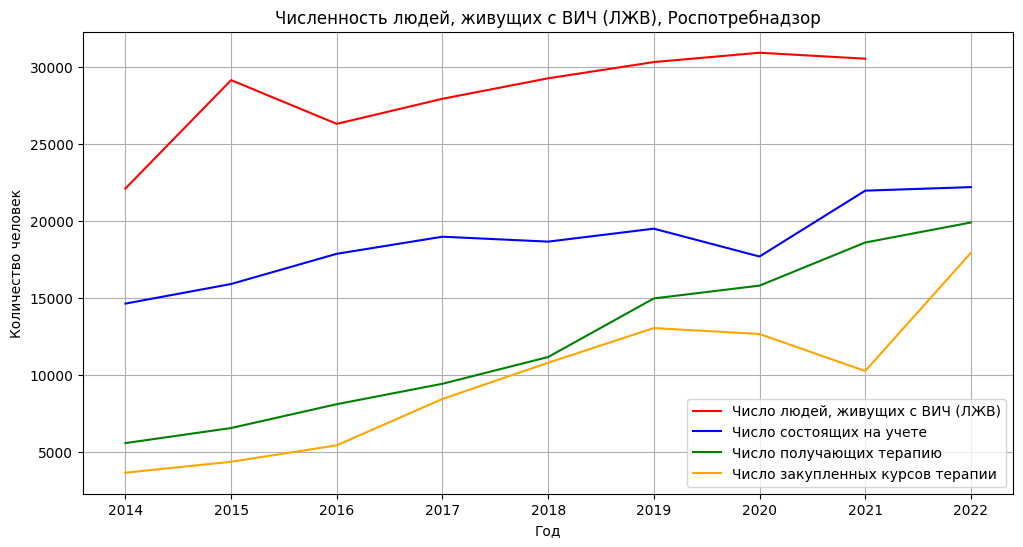

In [159]:
hiv_amount = (df.
    loc[
        (df.indicator_code == 'Y904000001') &
        (df.federal_district == 'Уральский')
]).groupby(['year'])['indicator_value'].mean()

hiv_regsitered = (df.
    loc[
        (df.indicator_code == 'Q304000011') &
        (df.federal_district == 'Уральский')
]).groupby(['year'])['indicator_value'].mean()

hiv_with_therapy = (df.
    loc[
        (df.indicator_code.isin(['Q304000012', 'Q304000023'])) &
        (df.federal_district == 'Уральский')
]).groupby(['year'])['indicator_value'].mean()

count_of_courses = (df.
    loc[
        (df.indicator_code == 'U204000001') &
        (df.federal_district == 'Уральский')
]).groupby(['year'])['indicator_value'].mean()


result = pd.concat([hiv_amount, hiv_regsitered, hiv_with_therapy, count_of_courses], axis=1)
result.columns = [
    'Число людей, живущих с ВИЧ (ЛЖВ)',
    'Число состоящих на учете',
    'Число получающих терапию',
    'Число закупленных курсов терапии'
]

result.plot(
    kind='line',
    figsize=(12, 6),
    title='Численность людей, живущих с ВИЧ (ЛЖВ), Роспотребнадзор',
    xlabel='Год',
    ylabel='Количество человек',
    color = ['red', 'blue', 'green', 'orange'],
    grid=True,
)

<Axes: title={'center': 'Число умерших от ВИЧ'}, xlabel='Год', ylabel='Количество человек'>

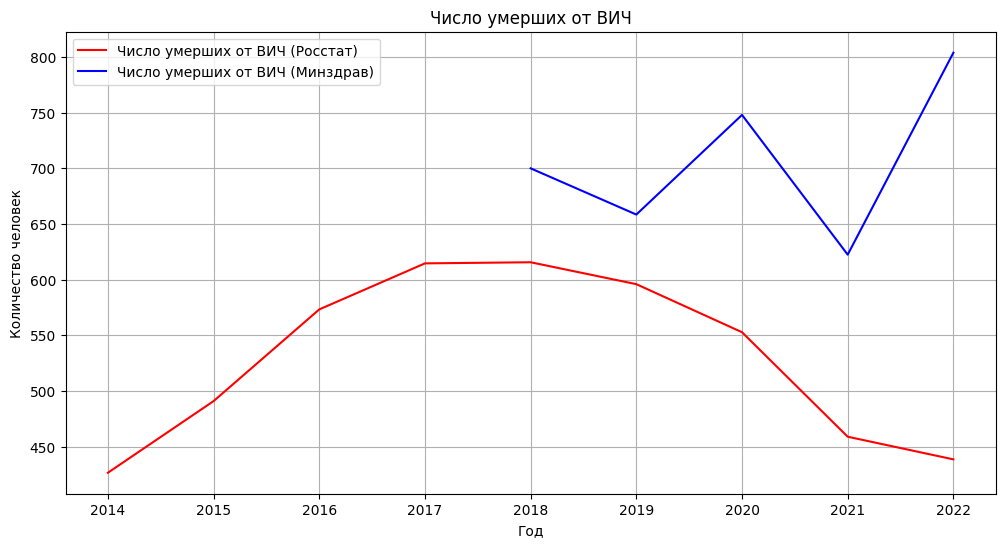

In [165]:
deathes_rosstat = (df.
    loc[
        (df.indicator_code == 'Y404000001') &
        (df.federal_district == 'Уральский')
]).groupby(['year'])['indicator_value'].mean()

deathes_minsdrav = (df.
    loc[
        (df.indicator_code == 'Q304000018') &
        (df.federal_district == 'Уральский')
]).groupby(['year'])['indicator_value'].mean()

result = pd.concat([deathes_rosstat, deathes_minsdrav], axis=1)
result.columns = ['Число умерших от ВИЧ (Росстат)', 'Число умерших от ВИЧ (Минздрав)']

result.plot(
    kind='line',
    figsize=(12, 6),
    title='Число умерших от ВИЧ',
    xlabel='Год',
    ylabel='Количество человек',
    color = ['red', 'blue',],
    grid=True,
)

<Axes: title={'center': 'Коэффициент смертности от ВИЧ'}, xlabel='Год', ylabel='Количество человек на 100 тыс. населения'>

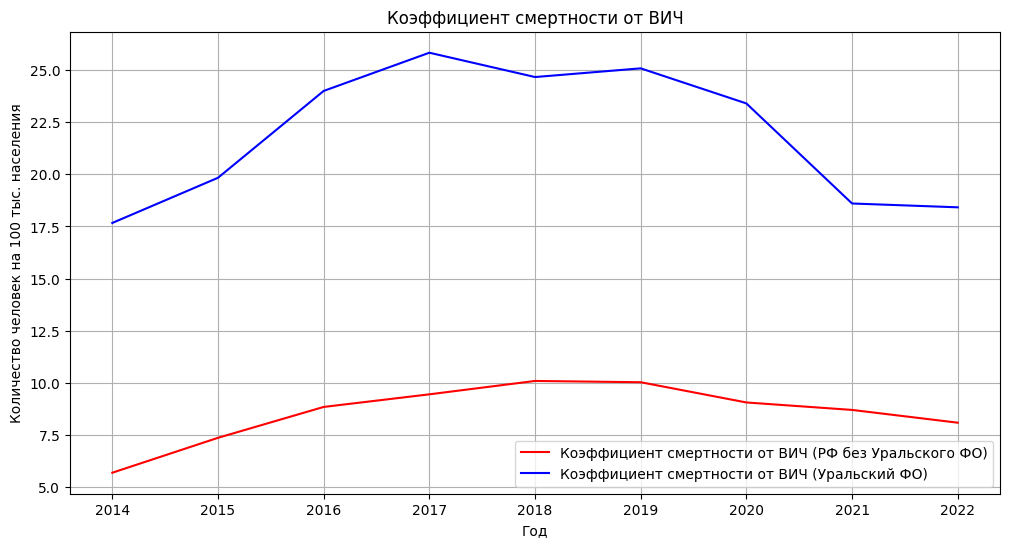

In [173]:
death_coeff_rf = (df.
    loc[
        (df.indicator_code == 'Y404000002') &
        (df.federal_district != 'Уральский')
]).groupby(['year'])['indicator_value'].mean()


death_coeff_ural = (df.
    loc[
        (df.indicator_code == 'Y404000002') &
        (df.federal_district == 'Уральский')
]).groupby(['year'])['indicator_value'].mean()


result = pd.concat([death_coeff_rf, death_coeff_ural], axis=1)
result.columns = ['Коэффициент смертности от ВИЧ (РФ без Уральского ФО)', 'Коэффициент смертности от ВИЧ (Уральский ФО)']

result.plot(
    kind='line',
    figsize=(12, 6),
    title='Коэффициент смертности от ВИЧ',
    xlabel='Год',
    ylabel='Количество человек на 100 тыс. населения',
    color = ['red', 'blue',],
    grid=True,
)